<a href="https://colab.research.google.com/github/zohaib-ansari/NLP-project/blob/main/Zohaib_NLP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medicine Review Analysis**

Importing all the libraries

In [3]:
import pandas as pd
import numpy as np
import os
import nltk
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Importing all the required packages from the Library

In [4]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

If want to use dataset from google drive, mount it with the help of the following code

In [4]:
'''from google.colab import drive
drive.mount('/content/drive/', force_remount=True)'''

Mounted at /content/drive/


We have uploded the dataset directly here with the help of the following code

In [5]:
train = pd.read_table("/content/drugLibTrain_raw.tsv")
test = pd.read_table("/content/drugLibTest_raw.tsv")

Understanding the Shape of the dataset (no of rows,cloumns)

In [6]:
print(train.shape)
print(test.shape)

(3107, 9)
(1036, 9)


Merging Train Test Data

In [7]:
df = pd.concat([train , test])
df.shape

(4143, 9)

Displaying the dataset

In [8]:
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


Checking the Null values

In [9]:
print(df.isnull().sum())

Unnamed: 0           0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64


Dropping null values since it makes only around 0.55% of whole data

In [10]:
DF = df.dropna()
print(DF.isnull().sum())

Unnamed: 0           0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
dtype: int64


Checking the shape again after dropping null values

In [11]:
DF.shape

(4132, 9)

Dropping the unnmaed cloumns

In [ ]:
Data = DF.drop(columns=['Unnamed: 0'])

Displying the Data again

In [12]:
Data.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


Displaying the Count of Top 10 Medicines with rating 1

In [18]:
Data.loc[DF["rating"] == 1] ["urlDrugName"].value_counts().head(10)

cipro        10
propecia      9
paxil         9
lexapro       8
seroquel      8
levaquin      7
metrogel      7
neurontin     7
avelox        7
zocor         7
Name: urlDrugName, dtype: int64

Displaying the Count of Top 10 Medicines with rating 10

In [19]:
Data.loc[DF["rating"] == 10] ["urlDrugName"].value_counts().head(10)

synthroid    22
chantix      16
lipitor      14
nexium       14
xanax        12
imitrex      12
premarin     12
lexapro      12
paxil        12
zoloft       11
Name: urlDrugName, dtype: int64

Getting info of the Data

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 0 to 1035
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        4132 non-null   object
 1   rating             4132 non-null   int64 
 2   effectiveness      4132 non-null   object
 3   sideEffects        4132 non-null   object
 4   condition          4132 non-null   object
 5   benefitsReview     4132 non-null   object
 6   sideEffectsReview  4132 non-null   object
 7   commentsReview     4132 non-null   object
dtypes: int64(1), object(7)
memory usage: 290.5+ KB


Plotting a bar chart to show the Distribution of Rating

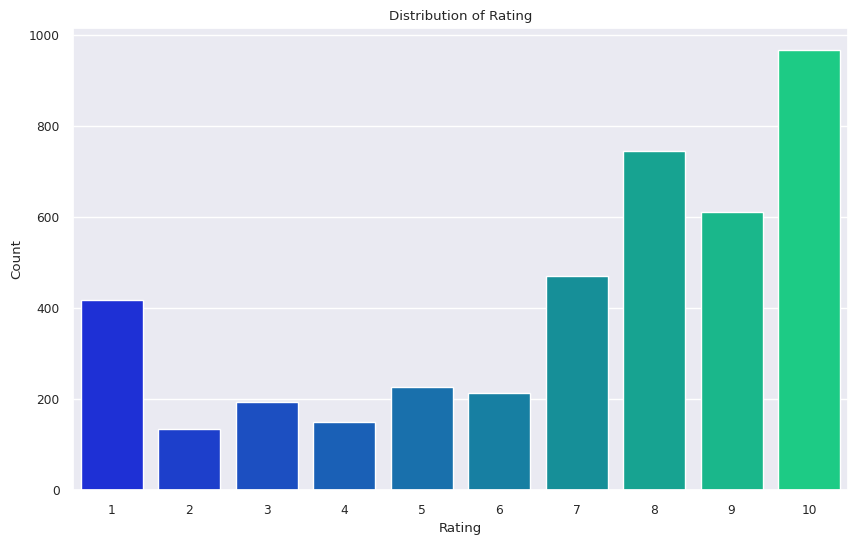

In [25]:
rate = dict(Data['rating'].value_counts().sort_index())
Rate = list(rate.keys())[0:10]
values = list(rate.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 0.8)
plt.rcParams['figure.figsize'] = [10, 6]

sns_ = sns.barplot(x = Rate, y = values, palette = ('winter'))
sns_.set_title("Distribution of Rating")
sns_.set_xlabel("Rating")
sns_.set_ylabel("Count");

Plotting a bar chart to display the drugs with 10/10 ratings

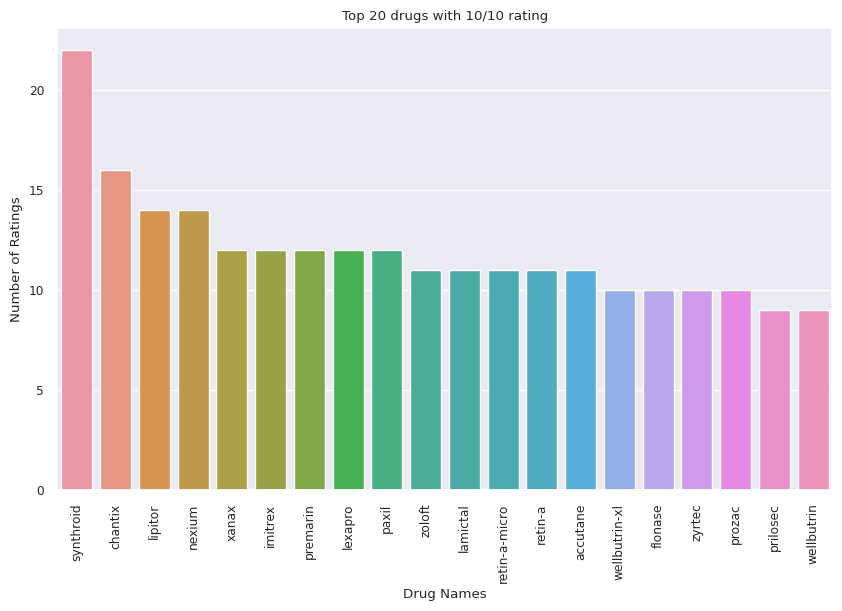

In [26]:
sns.set(font_scale = 0.8, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [10, 6]

rating = dict(Data.loc[Data.rating == 10, "urlDrugName"].value_counts())
drugName = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugName[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Plotting a bar chart to display the drugs with 1/10 ratings

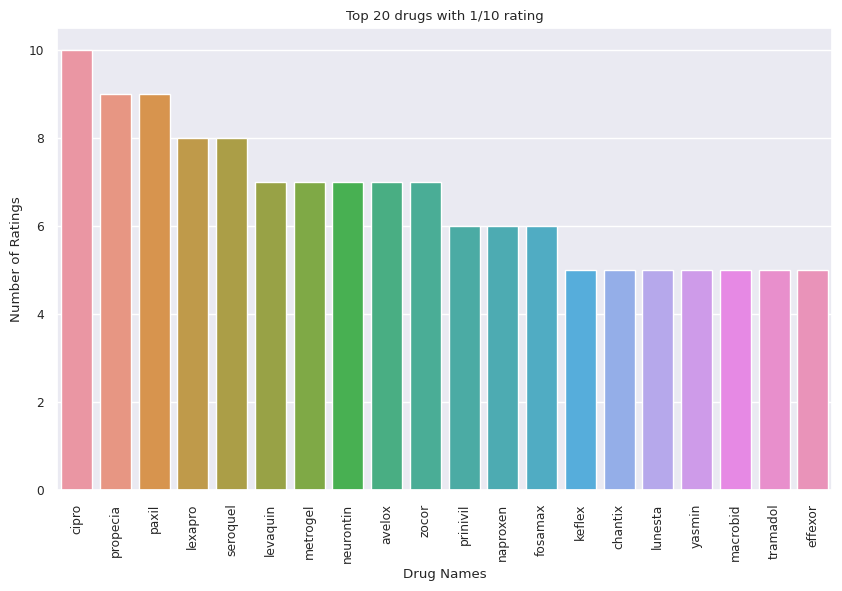

In [27]:
sns.set(font_scale = 0.8, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [10, 6]

rating = dict(Data.loc[Data.rating == 1, "urlDrugName"].value_counts())
drugName = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugName[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Plotting a bar chart to display the top 20 count of maximum number of reviews of the Drugs

In [30]:
drugName = DF["urlDrugName"].value_counts()
import plotly.express as px
fig = px.bar(drugName[:20], y='urlDrugName',title='Number of Reviews for Top 20 Drugs')
fig.show()

Plotting a bar chart to display number of reviews for top 30 conditions

In [31]:
conditions = DF["condition"].value_counts()
import plotly.express as px
fig = px.bar(conditions[:30], y='condition',title='Number of Reviews for Top 30 conditions')
fig.show()

**Text Processing**

Applying Tokenisation, Lemmitization.
Removing Stopwrods.
Converting the text in lower case.


In [34]:
# text preprocessing
def clean_text(text):
  #convert in lower case
  text=text.lower()
  #next step,apply word_tokenize on given text
  tokens=nltk.word_tokenize(text)
  #keeps alphabets only and remove special charecters and digits 
  #inbuilt function isalpha() means only accept alphabets 
  word_tokens=[w for w in tokens if w.isalpha()]
  #to remove stopwords  
  stop=stopwords.words('english')
  clean_tokens=[w for w in word_tokens if w not in stop]
  #lemmetization of clean_tokens list
  lemma=WordNetLemmatizer()
  lemma_tokens=[lemma.lemmatize(w) for w in clean_tokens]
  #return lemma_tokens
  return ' '.join(lemma_tokens)

Printing Reviews

In [53]:
print(Data['benefitsReview'])

0       slowed the progression of left ventricular dys...
1       Although this type of birth control has more c...
2       I was used to having cramps so badly that they...
3       The acid reflux went away for a few months aft...
4       I think that the Lyrica was starting to help w...
                              ...                        
1031    Detoxing effect by pushing out the system thro...
1032    The albuterol relieved the constriction, irrit...
1033                      Serve Acne has turned to middle
1034    My overall mood, sense of well being, energy l...
1035    Up until 2 years ago, it worked really well on...
Name: benefitsReview, Length: 4132, dtype: object


Doing Sentiment Analysis

In [37]:
#Sentiment
Data['Sentiment'] = np.where(Data['rating'] > 5, 1, 0)
Data.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Sentiment
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",0
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",0
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,1
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,0
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,0


In [38]:
Data['Sentiment'].value_counts()

1    3009
0    1123
Name: Sentiment, dtype: int64

In [ ]:
Plotting Bar Chart based on the Semantic

<Axes: xlabel='Sentiment', ylabel='count'>

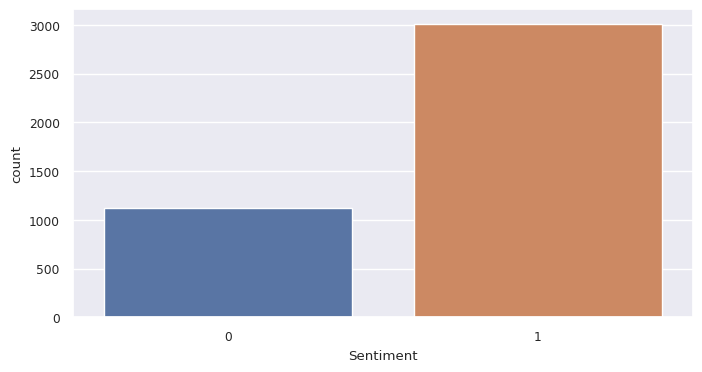

In [39]:
sns.set(font_scale = 0.8, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [8, 4]
sns.countplot(x=Data["Sentiment"])

In [40]:
Data['Sentiment'].describe()

count    4132.000000
mean        0.728219
std         0.444932
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Sentiment, dtype: float64

Splitting the Data into Train and Test using sklearn

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data['benefitsReview'], Data['Sentiment'], test_size=0.2, random_state=0)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (3305,)
The Test set size  (827,)


Importing modules

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [44]:
vect = TfidfVectorizer().fit(X_train)
len(vect.get_feature_names_out())

7831

In [45]:
tfidf = TfidfVectorizer(min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train)

prinitng features

In [46]:
print("Number of features : %d \n" %len(tfidf.get_feature_names_out()))
print("Show some feature names : \n", tfidf.get_feature_names_out()[::1000])

Number of features : 1979 

Show some feature names : 
 ['10' 'lighter']


Importing and using Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression model
lr = LogisticRegression()

# train the model on the training dataset
lr.fit(X_train_tfidf, y_train)

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [48]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

Importing modules for displaying accuracy and score

In [49]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score

Displaying the Accuracy and scores

In [52]:
predictions = lr.predict(tfidf.transform(X_test))
modelEvaluation(predictions)


Accuracy on validation set: 0.8065

AUC score : 0.6581

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.35      0.48       215
           1       0.81      0.97      0.88       612

    accuracy                           0.81       827
   macro avg       0.80      0.66      0.68       827
weighted avg       0.80      0.81      0.78       827


Confusion Matrix : 
 [[ 75 140]
 [ 20 592]]
